# Comparison between the C++ and Rust paradigm in MPI

## Comparison of singularity image sizes

Though things might not be exactly the same in terms of installations and everything the build size for the images are mariginally different. Though the installations and cleanup can be more optimized and better on the first direct try this is what the singularity image sizes look like.
129M	allToAllC.simg
742M	all_to_all.simg
257M	circlPassC.simg
741M	circle_pass.simg

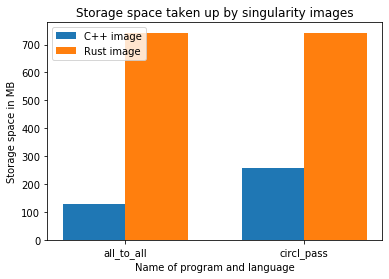

In [1]:
import matplotlib.pyplot as plt
import numpy as np
N=2
c_image_sizes = [129, 257]
rust_image_sizes = [742, 741]
ind = np.arange(N)
width = 0.35       
plt.bar(ind, c_image_sizes, width, label='C++ image')
plt.bar(ind + width, rust_image_sizes, width, label='Rust image')

plt.xlabel("Name of program and language")
plt.ylabel("Storage space in MB")
plt.title("Storage space taken up by singularity images")

plt.xticks(ind + width / 2, ('all_to_all', 'circl_pass'))
plt.legend(loc='upper left')
plt.show()

## Comparison of runtimes between C++ and Rust

When we look at a particular size of message and a single node we can compare the run times which are averaged between 10 runs for each program.

### Looking at single node runtimes

#### Looking at single node 8 processes

(-1, 4)

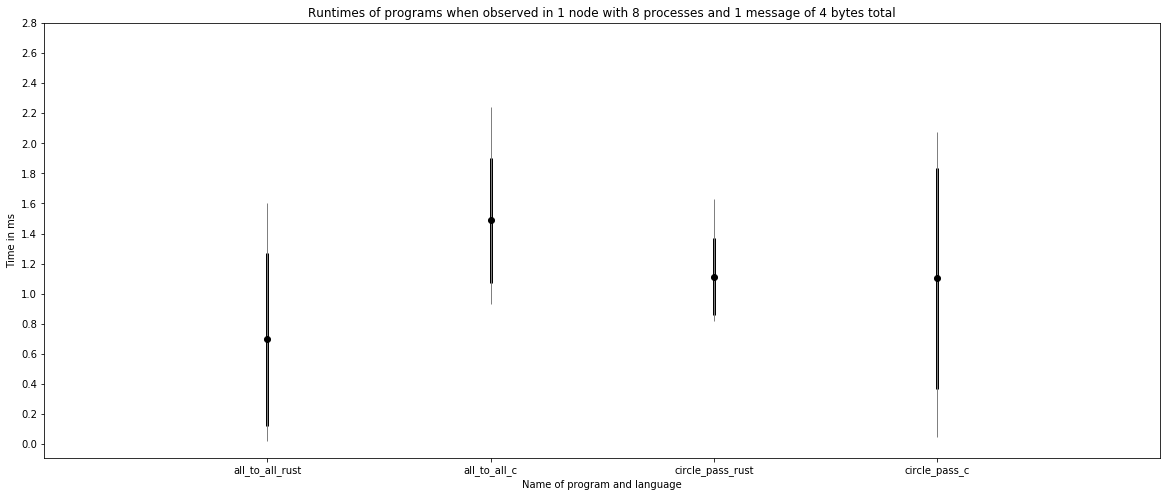

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# rust all_to_all 1 node 8 ranks message size 1 which is 4 bytes
all_to_all_rust_runtimes = np.array([873.146, 19.199, 821.31, 881.156, 21.639, 1597.455, 1605.9, 873.83, 249.137, 21.658])
# switching time as it was in micro seconds and c++ code was in milli seconds
all_to_all_rust_runtimes = np.array(list(map(lambda t: t / 1000, all_to_all_rust_runtimes)))
# c all_to_all 1 node 8 ranks message size 1 which is 4 bytes
all_to_all_c_runtimes = np.array([1.663163, 0.940828, 1.659749, 1.535852, 2.239058, 1.354560, 1.922419, 0.982197, 0.929752, 1.641678])
# rust circle_pass 1 node 8 ranks message size 1 which is 4 bytes
circle_pass_rust_runtimes = [1204.033, 934.806, 983.015, 854.622, 851.633, 1391.323, 821.045, 1146.96, 1630.039, 1302.797]
# switching time as it was in micro seconds and c++ code was in milli seconds
circle_pass_rust_runtimes = np.array(list(map(lambda t: t / 1000, circle_pass_rust_runtimes)))
# c circle_pass 1 node 8 ranks message size 1 which is 4 bytes
circle_pass_c_runtimes = np.array([2.031291, 0.343764, 2.075363, 0.920538, 1.624493, 1.665786, 0.761118, 1.460437, 0.089614, 0.049343])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,8)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 1 node with 8 processes and 1 message of 4 bytes total")
plt.yticks(np.arange(0,3,step=0.2))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

(-1, 4)

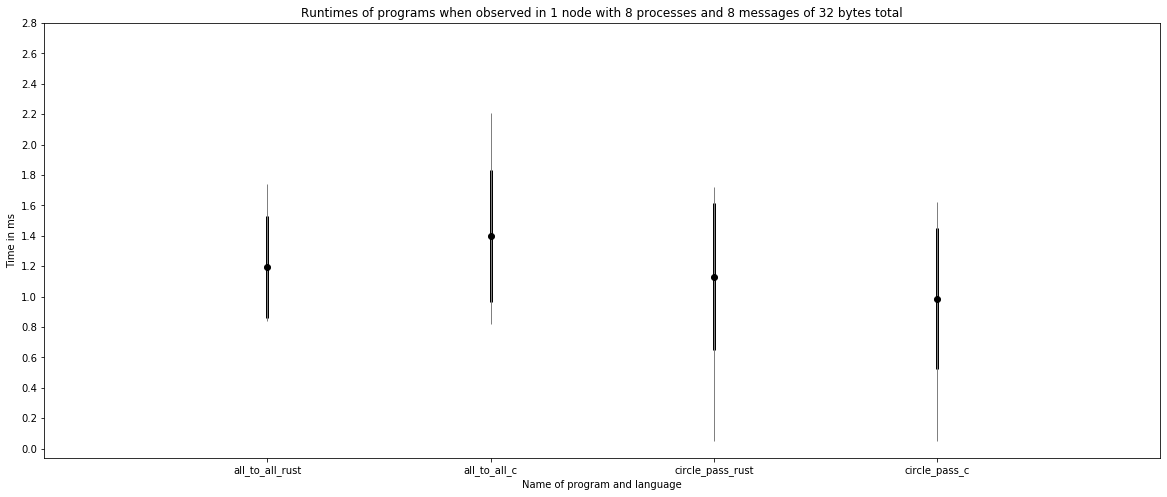

In [3]:
# rust all_to_all 1 node 8 ranks message size 8 which is 32 bytes
all_to_all_rust_runtimes = np.array([.83644, 1.240643, .932127, 1.73987, 1.544199, 1.741561, 1.07503, .96929, .848174, 1.04388])
# c all_to_all 1 node 8 ranks message size 8 which is 32 bytes
all_to_all_c_runtimes = np.array([2.205919, 1.485778, 1.719313, 0.993738, 0.961779, 0.822440, 1.756039, 0.986416, 1.761634, 1.292378])
# rust circle_pass 1 node 8 ranks message size 8 which is 32 bytes
circle_pass_rust_runtimes = np.array([.89785, 1.545097, 1.623731, .990273, .048093, .897473, 1.721117, .887273, 1.109577, 1.582326])
# c circle_pass 1 node 8 ranks message size 8 which is 32 bytes
circle_pass_c_runtimes = np.array([0.682291, 1.453247, 0.927072, 0.623319, 1.586916, 0.046728, 0.869377, 0.901129, 1.621993, 1.152709])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,8)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 1 node with 8 processes and 8 messages of 32 bytes total")
plt.yticks(np.arange(0,3,step=0.2))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

(-1, 4)

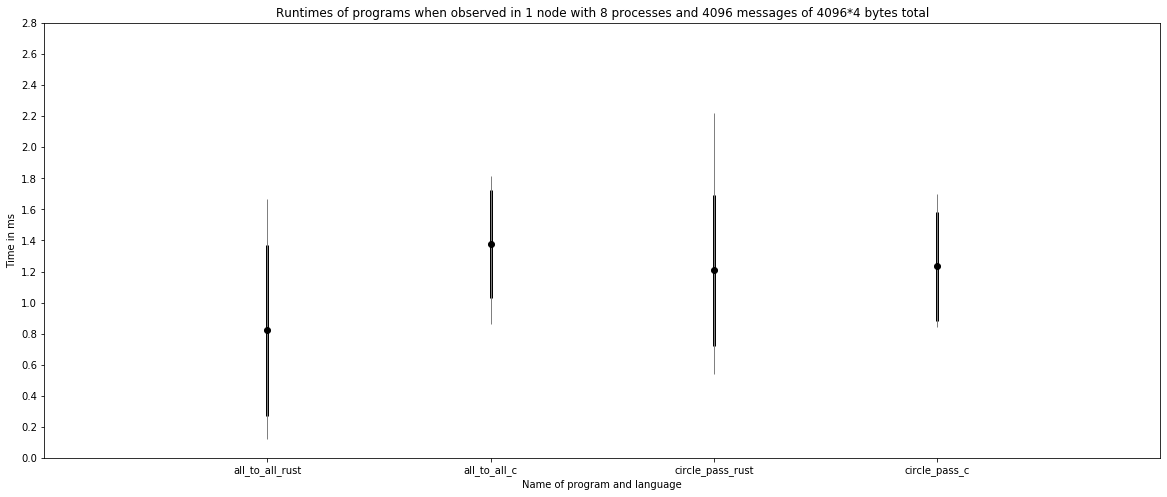

In [4]:
# rust all_to_all 1 node 8 ranks message size 4096 which is 4096*4 bytes
all_to_all_rust_runtimes = np.array([.896174, .457421, .92752, .175082, 1.663943, .95576, 1.2512, 1.615098, .122902, .148291])
# c all_to_all 1 node 8 ranks message size 4096 which is 4096*4 bytes
all_to_all_c_runtimes = np.array([0.982517, 1.540113, 1.648333, 1.812719, 0.864403, 1.657117, 1.714984, 1.539852, 1.011925, 0.992248])
# rust circle_pass 1 node 8 ranks message size 4096 which is 4096*4 bytes
circle_pass_rust_runtimes = np.array([.959942, 1.524475, 1.721519, 1.499002, .542669, .907259, .923456, .92443, .860944, 2.222077])
# c circle_pass 1 node 8 ranks message size 4096 which is 4096*4 bytes
circle_pass_c_runtimes = np.array([0.843359, 1.603335, 1.699938, 1.453467, 0.879448, 0.967914, 0.888757, 1.406413, 0.901416, 1.689877])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,8)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 1 node with 8 processes and 4096 messages of 4096*4 bytes total")
plt.yticks(np.arange(0,3,step=0.2))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

(-1, 4)

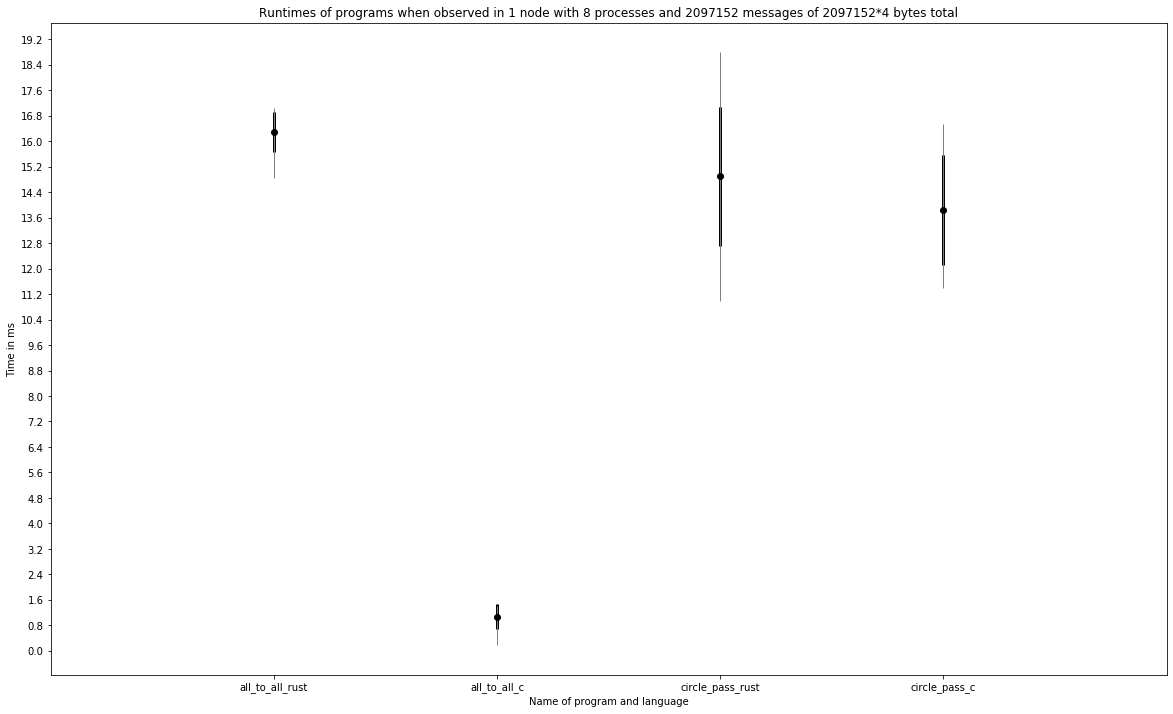

In [5]:
# rust all_to_all 1 node 8 ranks message size 2097152 which is 2097152*4 bytes
all_to_all_rust_runtimes = np.array([16.352196, 17.054654, 16.250398, 16.400145, 16.29748, 16.208175, 17.018774, 15.638671, 14.844567, 16.760718])
# c all_to_all 1 node 8 ranks message size 2097152 which is 2097152*4 bytes
all_to_all_c_runtimes = np.array([1.241138, 1.280492, 1.392620, 0.643926, 1.405377, 0.174040, 1.343360, 1.391519, 1.169888, 0.702161])
# rust circle_pass 1 node 8 ranks message size 2097152 which is 2097152*4 bytes
circle_pass_rust_runtimes = np.array([14.754176, 18.795341, 15.888427, 11.818179, 16.125446, 10.988057, 16.486374, 13.873611, 14.313698, 15.98334])
# c circle_pass 1 node 8 ranks message size 2097152 which is 2097152*4 bytes
circle_pass_c_runtimes = np.array([14.343327, 16.538393, 11.784699, 11.406366, 11.687262, 13.167109, 14.392998, 15.653767, 15.660865, 13.880016])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,12)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 1 node with 8 processes and 2097152 messages of 2097152*4 bytes total")
plt.yticks(np.arange(0,20,step=0.8))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

(-1, 4)

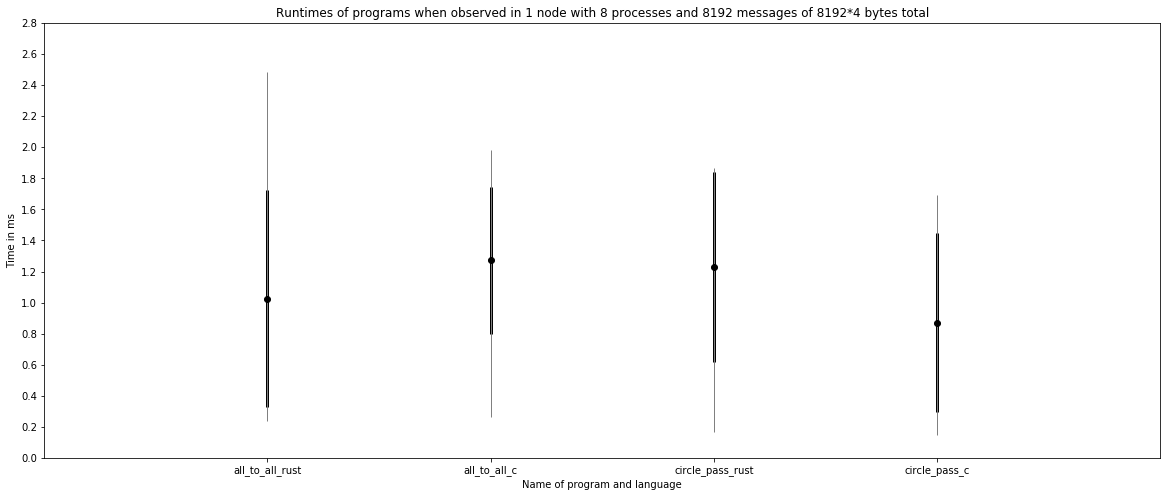

In [6]:
# rust all_to_all 1 node 8 ranks message size 8192 which is 8192*4 bytes
all_to_all_rust_runtimes = np.array([1.000596, 1.582181, 1.605094, .606263, .790201, 2.487738, .313748, .243897, 1.385861, .239449])
# c all_to_all 1 node 8 ranks message size 8192 which is 8192*4 bytes
all_to_all_c_runtimes = np.array([1.087764, 1.002133, 0.961546, 1.647627, 1.672143, 1.265427, 1.124877, 0.261845, 1.981501, 1.721825])
# rust circle_pass 1 node 8 ranks message size 8192 which is 8192*4 bytes
circle_pass_rust_runtimes = np.array([.726621, 1.589259, .180345, 1.864261, 1.542409, 1.197936, 1.729749, .16408, 1.756534, 1.543894])
# c circle_pass 1 node 8 ranks message size 8192 which is 8192*4 bytes
circle_pass_c_runtimes = np.array([0.148749 ,0.996144 ,1.042912 ,0.191083 ,0.145035 ,1.048094 ,0.414046 ,1.363765 ,1.660265 ,1.695054])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,8)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 1 node with 8 processes and 8192 messages of 8192*4 bytes total")
plt.yticks(np.arange(0,3,step=0.2))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

#### Looking at single node 4 processes

(-1, 4)

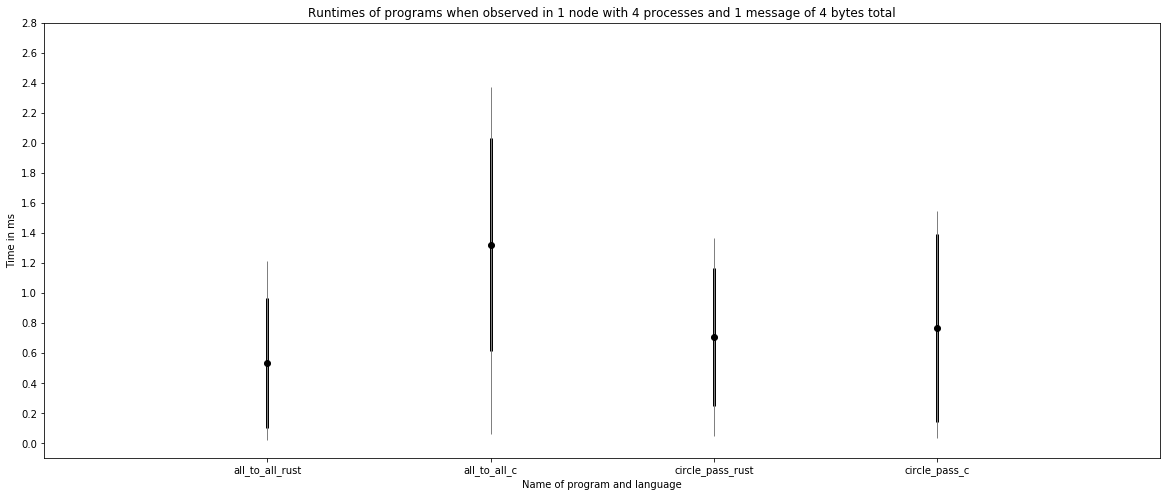

In [7]:
# rust all_to_all 1 node 4 ranks message size 1 which is 4 bytes
all_to_all_rust_runtimes = np.array([.783196, .021028, .022378, 1.213369, .02851, .825451, .811551, .791509, .835315, .021218])
# c all_to_all 1 node 4 ranks message size 1 which is 4 bytes
all_to_all_c_runtimes = np.array([0.061758, 0.919674, 1.632342, 0.060564, 1.666917, 1.615869, 1.665039, 2.373684, 1.601316, 1.631767])
# rust circle_pass 1 node 4 ranks message size 1 which is 4 bytes
circle_pass_rust_runtimes = np.array([1.291838, .919871, .076058, .779321, .797526, .848784, .088758, .04962, 1.365679, .860892])
# c circle_pass 1 node 4 ranks message size 1 which is 4 bytes
circle_pass_c_runtimes = np.array([1.476737, 0.036679, 1.233108, 1.411628, 0.035178, 0.036977, 1.545321, 1.022073, 0.842258, 0.037104])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,8)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 1 node with 4 processes and 1 message of 4 bytes total")
plt.yticks(np.arange(0,3,step=0.2))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

(-1, 4)

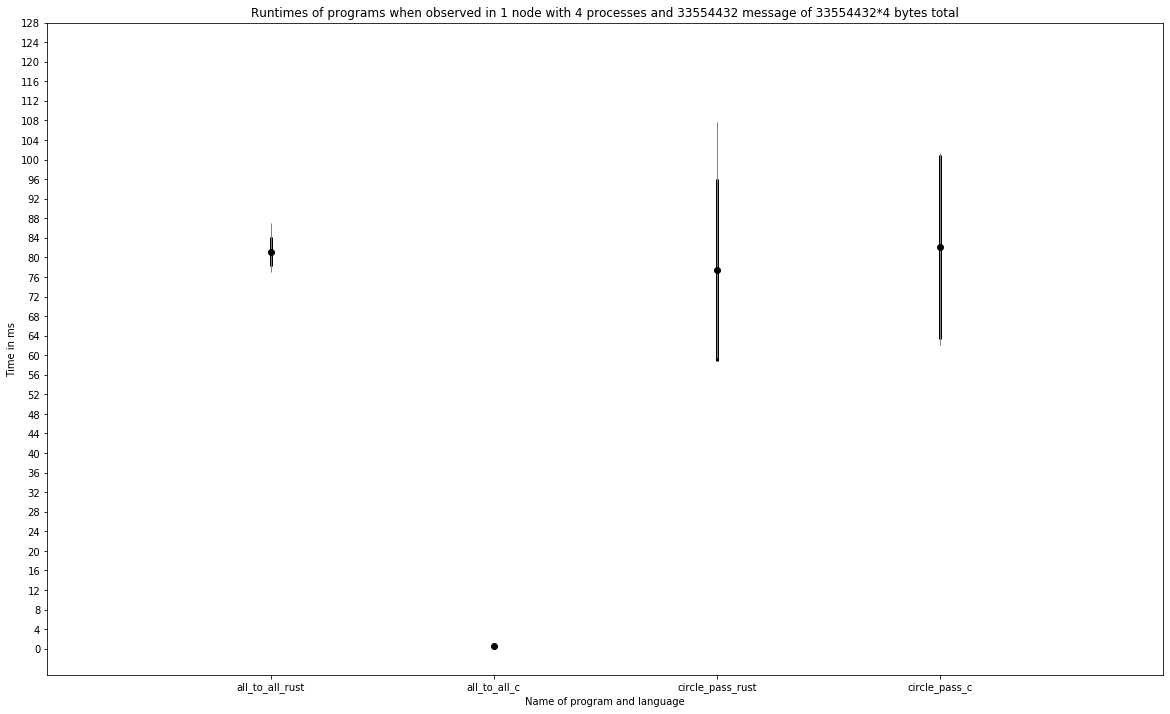

In [8]:
# rust all_to_all 1 node 4 ranks message size 33554432 which is 33554432*4 bytes
all_to_all_rust_runtimes = np.array([81.469289, 76.927003, 82.805713, 83.366336, 78.52054, 81.181252, 79.435727, 87.126248, 77.870651, 83.190606])
# c all_to_all 1 node 4 ranks message size 33554432 which is 33554432*4 bytes
all_to_all_c_runtimes = np.array([0.031224, 0.032101, 0.478351, 0.869432, 0.896700, 0.482026, 0.033863, 0.887817, 0.496099, 0.930168])
# rust circle_pass 1 node 4 ranks message size 33554432 which is 33554432*4 bytes
circle_pass_rust_runtimes = np.array([62.758837, 66.882745, 65.627682, 104.120582, 107.603171, 64.171455, 59.485464, 104.868259, 67.211084, 71.236312])
# c circle_pass 1 node 4 ranks message size 33554432 which is 33554432*4 bytes
circle_pass_c_runtimes = np.array([100.396564, 63.290082, 100.979304, 101.405464, 101.220859, 63.910618, 100.538841, 62.518409, 62.127955, 65.217962])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,12)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 1 node with 4 processes and 33554432 message of 33554432*4 bytes total")
plt.yticks(np.arange(0,130,step=4))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

### Looking at multiple node runtimes

#### Looking at 2 nodes and 1 process per node for a total of 2 processes

(-1, 4)

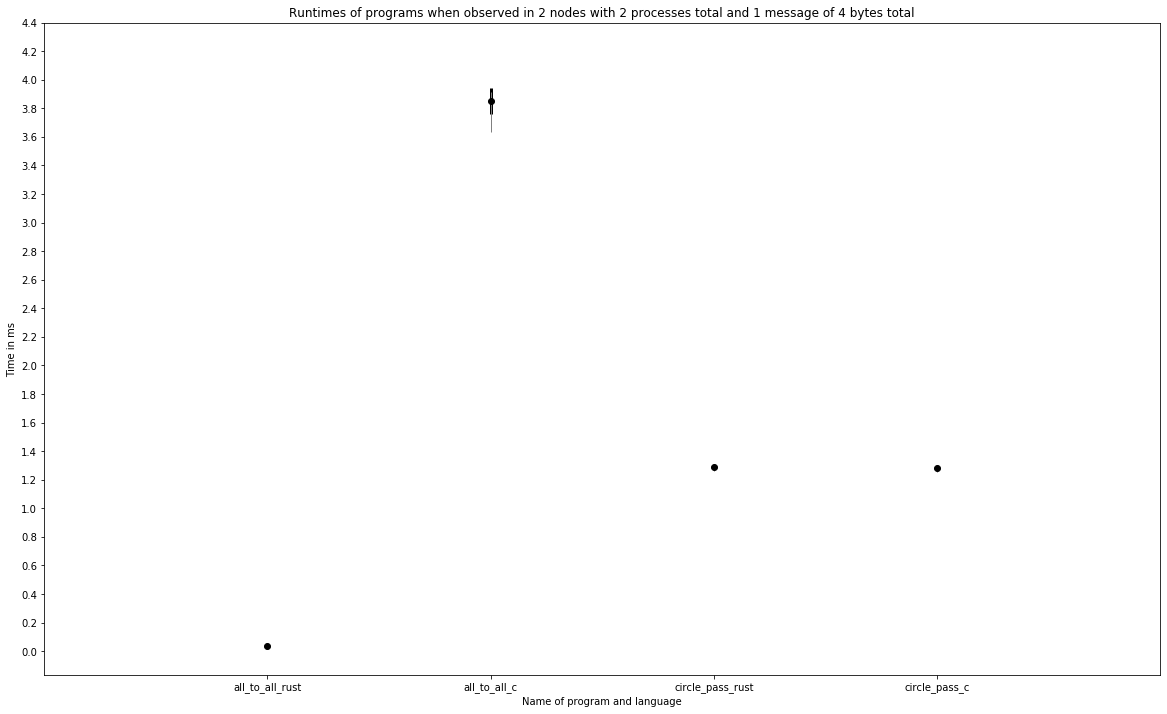

In [9]:
# rust all_to_all 2 nodes 2 ranks total message size 1 which is 4 bytes
all_to_all_rust_runtimes = np.array([.053736, .031316, .05309, .037667, .035641, .031667, .036863, .031514, .030945, .031697])
# c all_to_all 2 nodes 2 ranks total message size 1 which is 4 bytes
all_to_all_c_runtimes = np.array([3.878631, 3.898233, 3.913086, 3.901690, 3.881130, 3.885895, 3.637265, 3.710371, 3.913697, 3.894653])
# rust circle_pass 2 nodes 2 ranks total message size 1 which is 4 bytes
circle_pass_rust_runtimes = np.array([1.285602, 1.299575, 1.28636, 1.287361, 1.295684, 1.285613, 1.288994, 1.289244, 1.294176, 1.264258])
# c circle_pass 2 nodes 2 ranks total message size 1 which is 4 bytes
circle_pass_c_runtimes = np.array([1.297809, 1.284450, 1.285747, 1.253325, 1.279503, 1.284603, 1.288738, 1.283765, 1.289561, 1.288190])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,12)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 2 nodes with 2 processes total and 1 message of 4 bytes total")
plt.yticks(np.arange(0,4.5,step=0.2))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

#### Looking at 2 nodes and 16 processes per node for a total of 32 processes

(-1, 4)

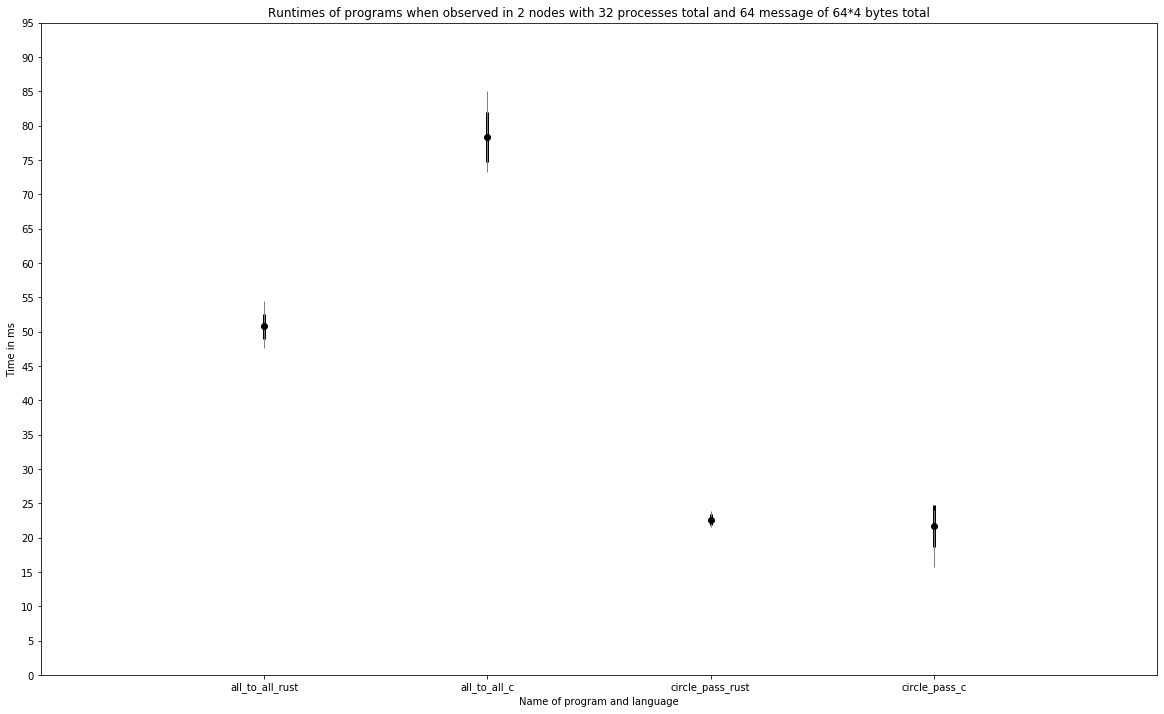

In [10]:
# rust all_to_all 2 nodes 32 ranks total message size 64 which is 64*4 bytes
all_to_all_rust_runtimes = np.array([50.551888, 49.245662, 50.742846, 51.489801, 50.608799, 52.170664, 51.583213, 54.43894, 47.670175, 49.0471])
# c all_to_all 2 nodes 32 ranks total message size 64 which is 64*4 bytes
all_to_all_c_runtimes = np.array([79.436190, 75.810399, 84.995400, 77.542558, 76.817140, 84.713500, 77.092089, 78.002792, 75.821169, 73.181469])
# rust circle_pass 2 nodes 32 ranks total message size 64 which is 64*4 bytes
circle_pass_rust_runtimes = np.array([23.401383, 22.316082, 23.358351, 21.646826, 22.54337, 21.656655, 23.867515, 22.81038, 21.572014, 23.002447])
# c circle_pass 2 nodes 32 ranks total message size 64 which is 64*4 bytes
circle_pass_c_runtimes = np.array([22.638507, 23.750916, 22.321798, 23.428902, 15.862349, 23.345795, 21.574613, 23.897056, 24.082888, 15.710495])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,12)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 2 nodes with 32 processes total and 64 message of 64*4 bytes total")
plt.yticks(np.arange(0,100,step=5))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

(-1, 4)

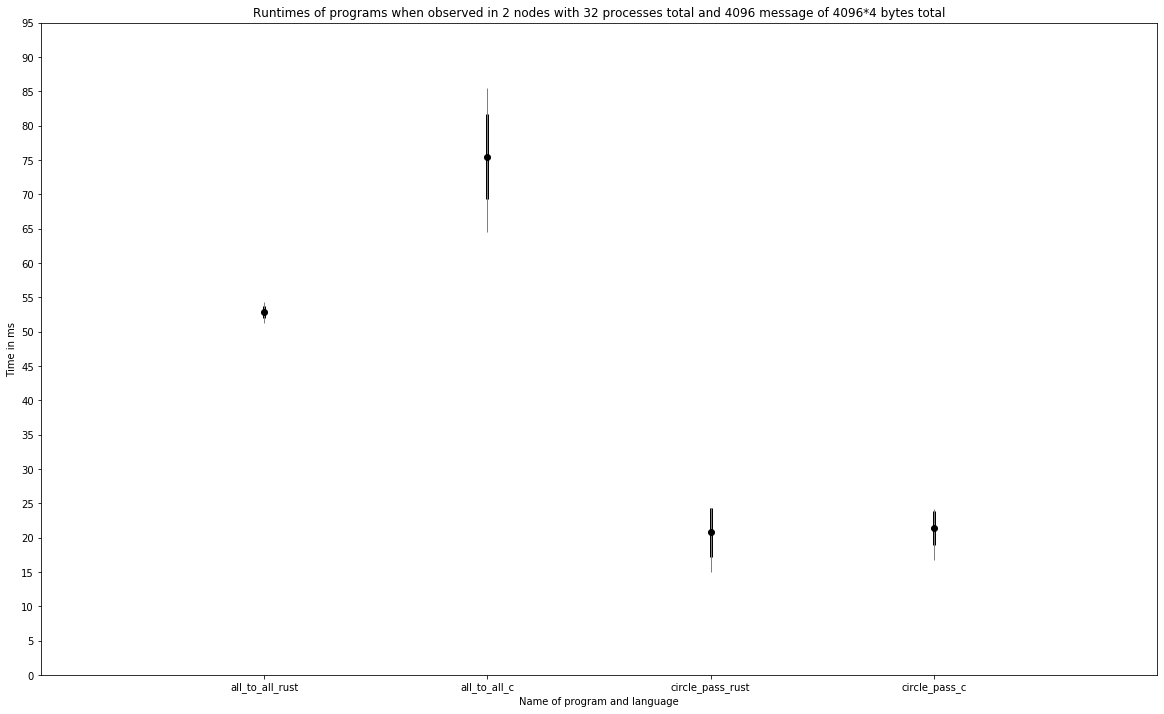

In [11]:
# rust all_to_all 2 nodes 32 ranks total message size 4096 which is 4096*4 bytes
all_to_all_rust_runtimes = np.array([52.374597, 53.070303, 54.281547, 52.815902, 51.205484, 53.302722, 51.749924, 53.435223, 53.78169, 53.02153])
# c all_to_all 2 nodes 32 ranks total message size 4096 which is 4096*4 bytes
all_to_all_c_runtimes = np.array([69.429822, 77.165689, 85.498322, 73.713288, 72.575510, 75.304266, 77.387653, 73.555999, 85.470650, 64.429898])
# rust circle_pass 2 nodes 32 ranks total message size 4096 which is 4096*4 bytes
circle_pass_rust_runtimes = np.array([15.147578, 22.946017, 24.075306, 23.116213, 23.922771, 24.24513, 19.717868, 16.760524, 22.851337, 15.015159])
# c circle_pass 2 nodes 32 ranks total message size 4096 which is 4096*4 bytes
circle_pass_c_runtimes = np.array([24.103370, 20.782594, 16.699512, 22.800233, 22.596583, 21.239862, 17.812558, 24.018668, 20.432401, 23.651227])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,12)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 2 nodes with 32 processes total and 4096 message of 4096*4 bytes total")
plt.yticks(np.arange(0,100,step=5))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

(-1, 4)

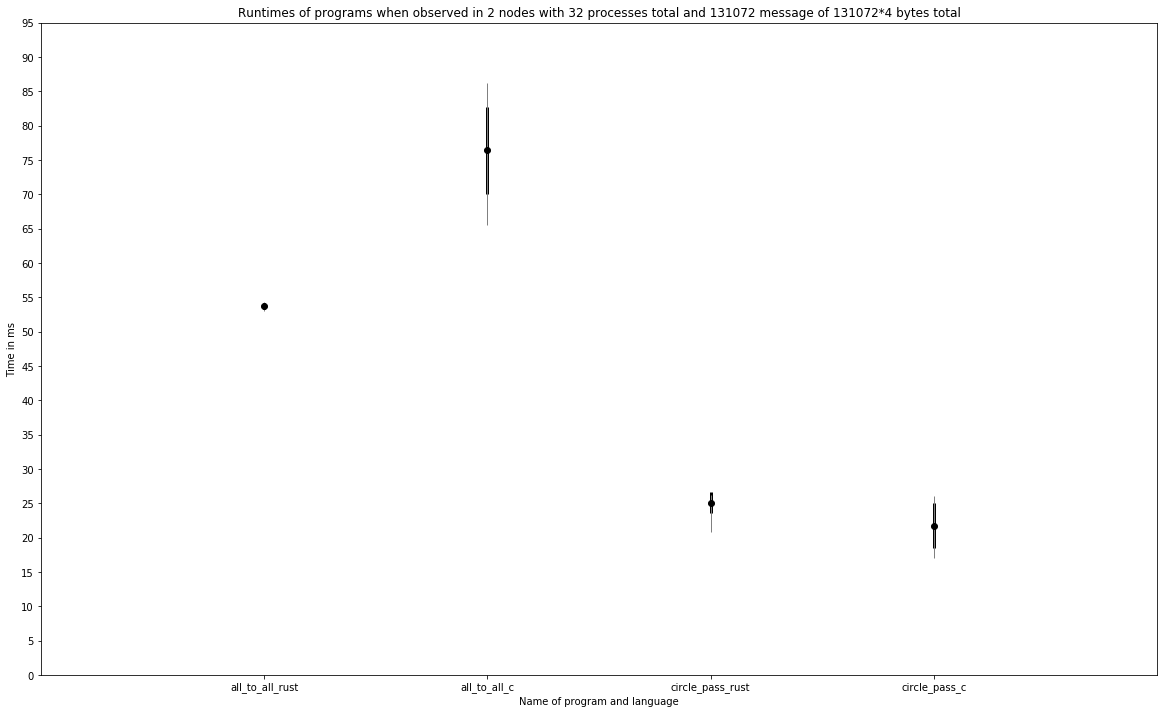

In [12]:
# rust all_to_all 2 nodes 32 ranks total message size 131072 which is 131072*4 bytes
all_to_all_rust_runtimes = np.array([54.300473, 54.088232, 54.278266, 53.166236, 52.968764, 53.364767, 54.048103, 53.50303, 54.081707, 53.945758])
# c all_to_all 2 nodes 32 ranks total message size 131072 which is 131072*4 bytes
all_to_all_c_runtimes = np.array([82.385052, 84.923506, 75.182006, 65.454200, 76.597761, 68.336841, 73.477071, 86.173445, 76.042566, 75.573586])
# rust circle_pass 2 nodes 32 ranks total message size 131072 which is 131072*4 bytes
circle_pass_rust_runtimes = np.array([24.938508, 25.776968, 20.740723, 25.711822, 25.849398, 24.853522, 26.221106, 25.937263, 24.909213, 25.933512])
# c circle_pass 2 nodes 32 ranks total message size 131072 which is 131072*4 bytes
circle_pass_c_runtimes = np.array([25.868736, 19.010026, 18.302772, 24.797130, 22.411354, 26.087083, 25.063157, 18.853795, 17.069697, 20.021744])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,12)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 2 nodes with 32 processes total and 131072 message of 131072*4 bytes total")
plt.yticks(np.arange(0,100,step=5))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

(-1, 4)

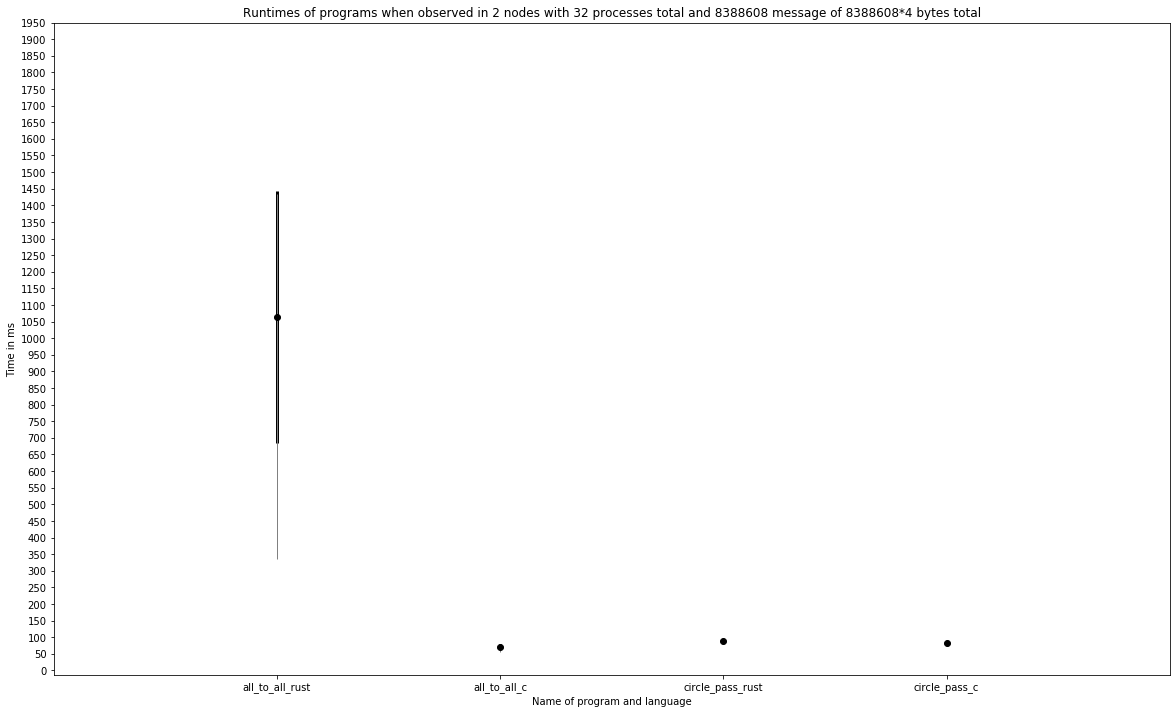

In [13]:
# rust all_to_all 2 nodes 32 ranks total message size 8388608 which is 8388608*4 bytes
all_to_all_rust_runtimes = np.array([1105.893136, 1425.321324, 1168.843098, 1141.007674, 367.589034, 334.665605, 1097.964076, 1435.142852, 1428.932805, 1136.910952])
# c all_to_all 2 nodes 32 ranks total message size 8388608 which is 8388608*4 bytes
all_to_all_c_runtimes = np.array([79.771198, 75.542152, 67.300726, 77.685114, 68.311695, 78.819402, 55.859871, 71.975235, 58.842581, 75.225178])
# rust circle_pass 2 nodes 32 ranks total message size 8388608 which is 8388608*4 bytes
circle_pass_rust_runtimes = np.array([86.633698, 87.768518, 86.863465, 87.617966, 87.336639, 86.613361, 88.947257, 88.118744, 87.488491, 87.509881])
# c circle_pass 2 nodes 32 ranks total message size 8388608 which is 8388608*4 bytes
circle_pass_c_runtimes = np.array([83.950914, 84.842376, 83.665445, 84.457666, 84.820580, 82.466412, 84.433060, 81.412878, 84.513936, 84.522918])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,12)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 2 nodes with 32 processes total and 8388608 message of 8388608*4 bytes total")
plt.yticks(np.arange(0,2000,step=50))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

#### Looking at 4 nodes and 8 processes per node for a total of 32 processes

(-1, 4)

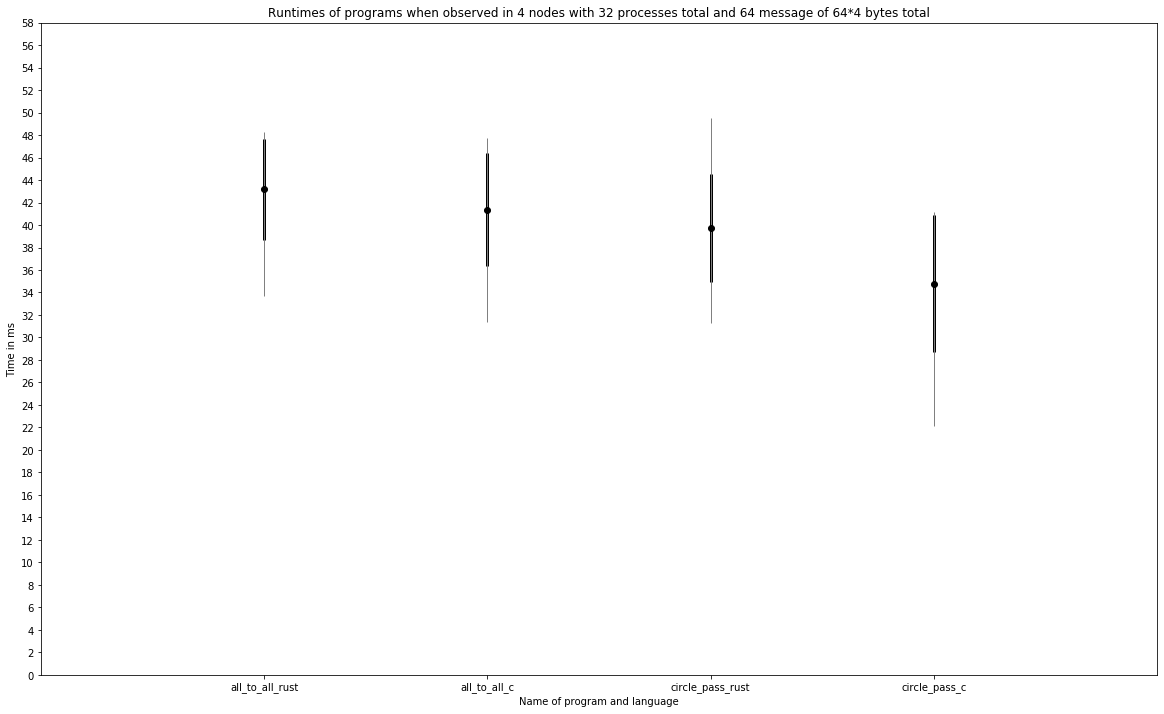

In [14]:
# rust all_to_all 4 nodes 32 ranks total message size 64 which is 64*4 bytes
all_to_all_rust_runtimes = np.array([43.40037, 39.785197, 46.088783, 47.167606, 33.695249, 44.795663, 47.342806, 43.475954, 48.304241, 37.531865])
# c all_to_all 4 nodes 32 ranks total message size 64 which is 64*4 bytes
all_to_all_c_runtimes = np.array([31.396437, 47.053710, 39.839815, 41.751325, 37.163742, 44.527274, 37.575182, 46.814889, 47.725651, 39.947778])
# rust circle_pass 4 nodes 32 ranks total message size 64 which is 64*4 bytes
circle_pass_rust_runtimes = np.array([40.830277, 41.032198, 39.485262, 34.794847, 49.478215, 31.296596, 41.625726, 41.696193, 35.094089, 42.232385])
# c circle_pass 4 nodes 32 ranks total message size 64 which is 64*4 bytes
circle_pass_c_runtimes = np.array([41.171327, 39.774906, 37.494019, 30.757464, 38.783550, 41.101806, 34.240931, 26.822314, 22.095058, 35.711695])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,12)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 4 nodes with 32 processes total and 64 message of 64*4 bytes total")
plt.yticks(np.arange(0,60,step=2))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

#### Looking at 6 nodes and 16 processes per node

(-1, 4)

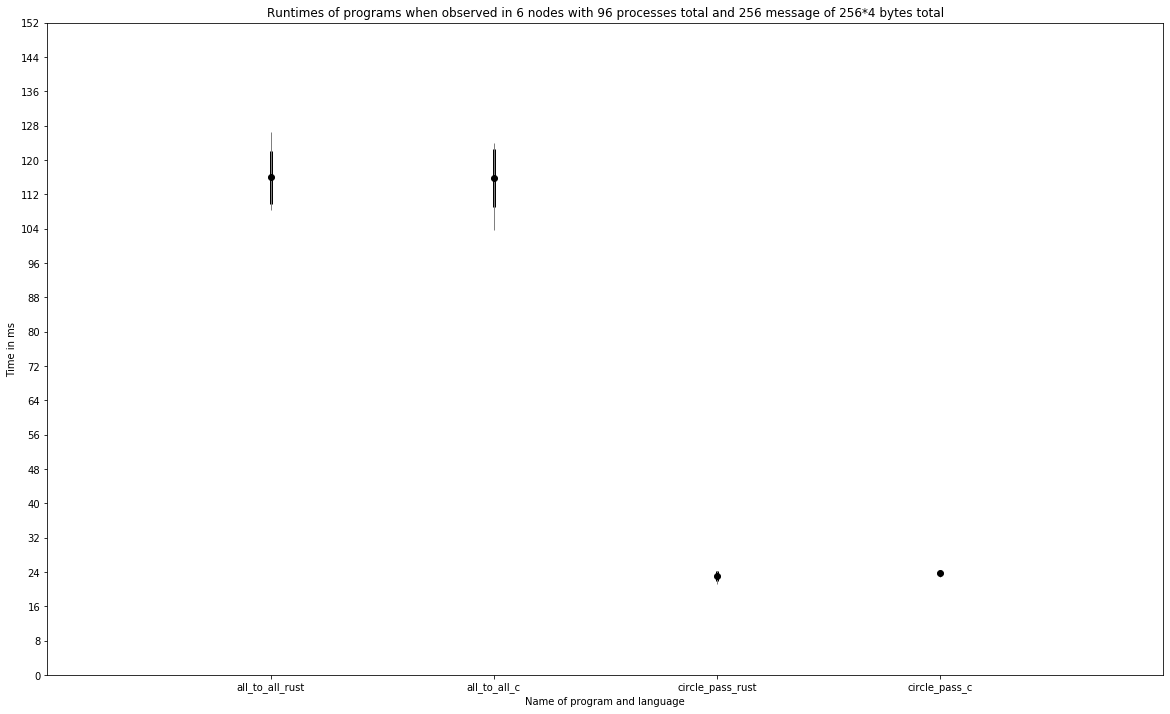

In [15]:
# rust all_to_all 6 nodes 96 ranks total message size 256 which is 256*4 bytes
all_to_all_rust_runtimes = np.array([108.786662, 113.426137, 113.767412, 124.531748, 123.013948, 116.08954, 110.687143, 108.342541, 126.529286, 114.036984])
# c all_to_all 6 nodes 96 ranks total message size 256 which is 256*4 bytes
all_to_all_c_runtimes = np.array([123.977138, 122.199990, 111.939080, 106.039856, 116.356650, 112.302983, 103.650980, 120.305208, 120.297642, 121.181875])
# rust circle_pass 6 nodes 96 ranks total message size 256 which is 256*4 bytes
circle_pass_rust_runtimes = np.array([24.259612, 23.270459, 22.543459, 21.100956, 23.332195, 24.028094, 22.486813, 24.173994, 21.290033, 23.806813])
# c circle_pass 6 nodes 96 ranks total message size 256 which is 256*4 bytes
circle_pass_c_runtimes = np.array([24.422491, 22.838453, 24.248276, 23.709415, 24.080163, 23.626925, 23.595426, 23.589890, 22.867534, 23.939002])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,12)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 6 nodes with 96 processes total and 256 message of 256*4 bytes total")
plt.yticks(np.arange(0,160,step=8))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

(-1, 4)

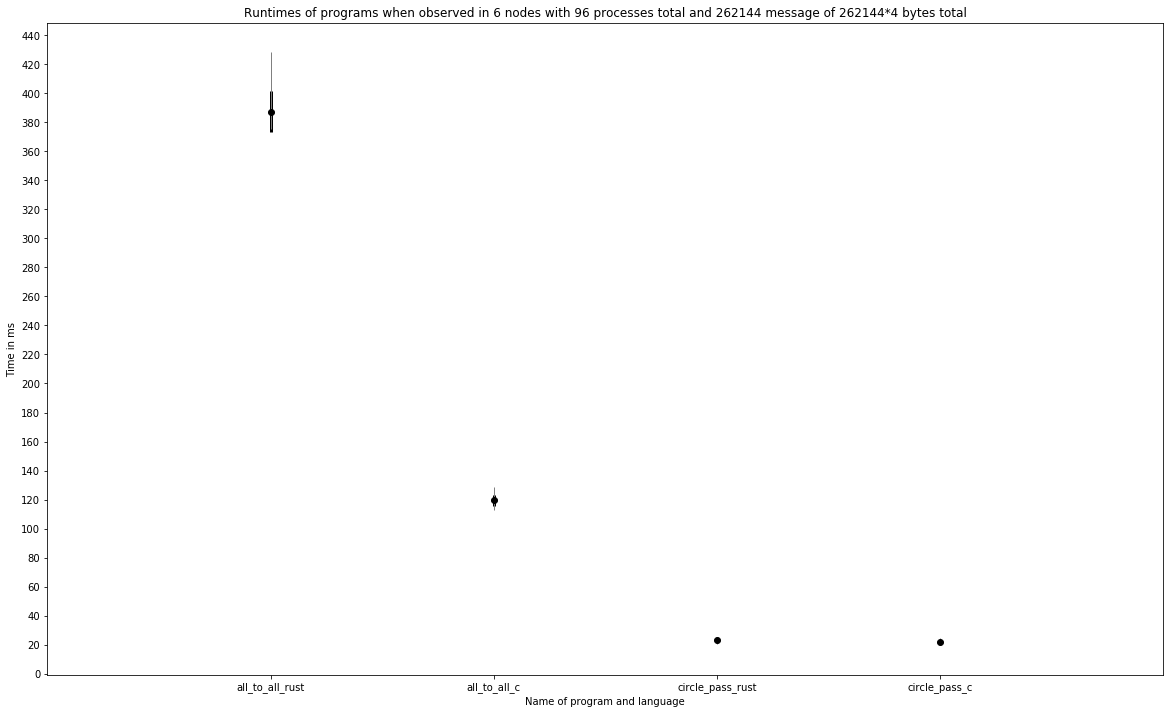

In [16]:
# rust all_to_all 6 nodes 96 ranks total message size 262144 which is 262144*4 bytes
all_to_all_rust_runtimes = np.array([382.553948, 385.304604, 428.207684, 383.99133, 386.076013, 383.684326, 384.244842, 375.389648, 382.667335, 381.03314])
# c all_to_all 6 nodes 96 ranks total message size 262144 which is 262144*4 bytes
all_to_all_c_runtimes = np.array([117.135329, 120.950621, 118.479198, 116.662897, 113.013912, 120.340968, 121.839726, 118.479211, 118.926352, 128.623601])
# rust circle_pass 6 nodes 96 ranks total message size 262144 which is 262144*4 bytes
circle_pass_rust_runtimes = np.array([24.780065, 20.601545, 23.605279, 25.070185, 21.831883, 21.914667, 24.466484, 22.835279, 24.738167, 22.981006])
# c circle_pass 6 nodes 96 ranks total message size 262144 which is 262144*4 bytes
circle_pass_c_runtimes = np.array([21.387303, 20.351578, 24.692638, 21.938564, 20.310767, 23.423772, 23.848973, 23.003848, 20.381562, 19.666528])
x_axis = np.array([all_to_all_rust_runtimes, all_to_all_c_runtimes, circle_pass_rust_runtimes, circle_pass_c_runtimes])
# showing boxplots to represent the data in the form of error bars detailed more and referenced from https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation 
mins = x_axis.min(1)
maxes = x_axis.max(1)
means = x_axis.mean(1)
std = x_axis.std(1)
plt.rcParams["figure.figsize"] = (20,12)
plt.errorbar(np.arange(4), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(4), means, [means-mins, maxes-means], fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(4), ('all_to_all_rust', 'all_to_all_c', 'circle_pass_rust', 'circle_pass_c'))
plt.title("Runtimes of programs when observed in 6 nodes with 96 processes total and 262144 message of 262144*4 bytes total")
plt.yticks(np.arange(0,450,step=20))
plt.xlabel("Name of program and language")
plt.ylabel("Time in ms")
plt.xlim(-1,4)

**All to all observations**

From observing the plots we can see clearly that all to all in rust outperforms C++ slightly, on small message sizes in most small sizes of cluster and performs close to or just slightly worse than C++ on larger size of clusters. 

The observations change a lot when we look at large message sizes where C++ outperforms rust majorly across all sizes of cluster.

The first observation of smaller messages taking lesser time in Rust is slightly interesting as you would expect the overhead of C++ bindings would actually increase the runtime or at lease be equal to running pure C++ code. This maybe due to simpler representation of objects in Rust or some other reasons(needs to be looked into more).


**Circle pass observations**

Both programs performance is pretty close to each other and not a lot of overhead is present for rust when doing the same program. This can be observed on all sizes of messages

## Comparing the change of runtime with number of processes in both languages

### Comparing change of runtime with p when message size is 1024

([<matplotlib.axis.YTick at 0x7fac7e50ceb8>,
 <a list of 8 Text yticklabel objects>)

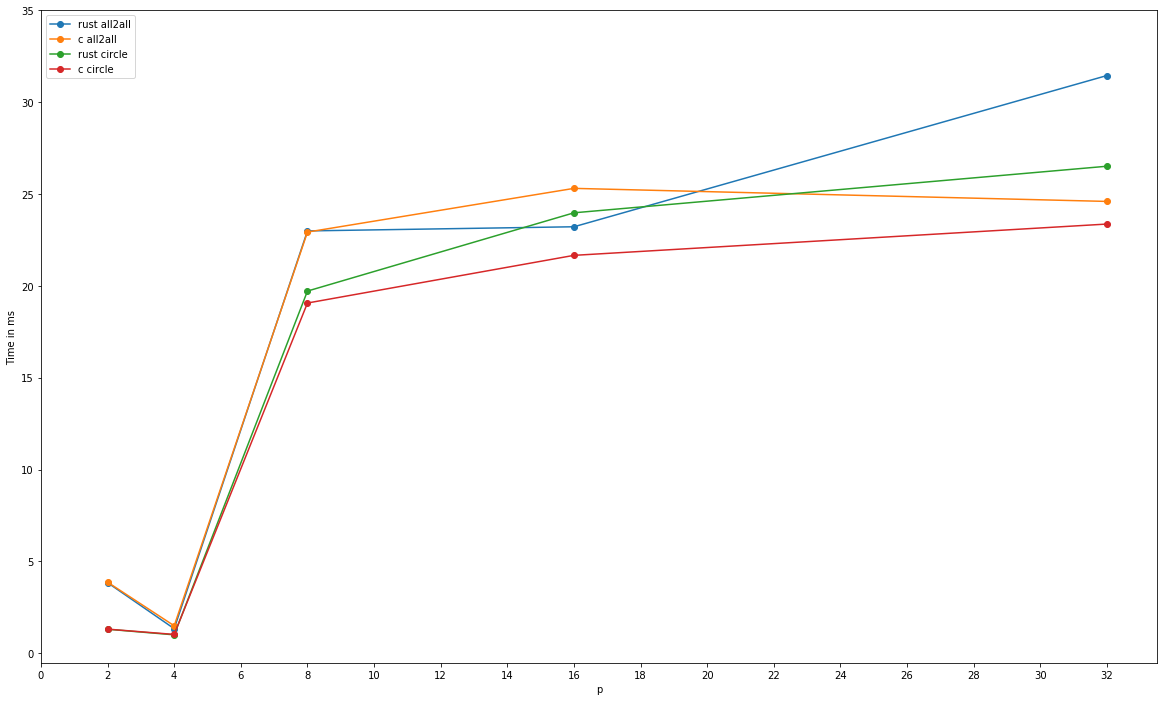

In [17]:
# 2 nodes p=2 message size = 1024
rust_all_to_all_n_2_p_2=np.array([3.954833, 3.899887, 3.920304, 3.901163, 3.846473, 3.910406, 3.655288, 3.662132, 3.680186, 3.963129])
c_all_to_all_n_2_p_2=np.array([3.892105, 3.875121, 3.916491, 3.884055, 3.893517, 3.934395, 3.877759, 3.883809, 3.619909, 3.883142])
rust_circle_n_2_p_2=np.array([1.320059, 1.326451, 1.313929, 1.293117, 1.319372, 1.282229, 1.243502, 1.310925, 1.322041, 1.312017])
c_circle_n_2_p_2=np.array([1.308113, 1.312848, 1.285892, 1.306534, 1.319900, 1.324076, 1.317341, 1.302566, 1.314979, 1.310695])

# taking avg of all 10 values
rust_all_to_all_p_2 = rust_all_to_all_n_2_p_2.mean(0)
c_all_to_all_p_2 = c_all_to_all_n_2_p_2.mean(0)
rust_circle_p_2= rust_circle_n_2_p_2.mean(0)
c_circle_p_2= c_circle_n_2_p_2.mean(0)

# 2 nodes p=4 message size = 1024
rust_all_to_all_n_2_p_4=np.array([1.115621, 1.234024, 1.244888, 1.234728, 1.236656, 1.204891, 1.236931, 1.274902, 1.235671, 2.324344])
c_all_to_all_n_2_p_4=np.array([1.160182, 1.679368, 1.227856, 1.361262, 1.285030, 2.064181, 1.498433, 1.475791, 1.507195, 1.672586])
rust_circle_n_2_p_4=np.array([1.682332, 1.277333, 1.760136, .746012, .124464, .651394, 1.764757, 1.739667, .126132, .124817])
c_circle_n_2_p_4=np.array([2.597632, 0.111682, 1.792457, 0.178836, 2.039701, 0.127302, 1.815084, 0.130428, 1.279723, 0.146197])

# taking avg of all 10 values
rust_all_to_all_p_4 = rust_all_to_all_n_2_p_4.mean(0)
c_all_to_all_p_4 = c_all_to_all_n_2_p_4.mean(0)
rust_circle_p_4 = rust_circle_n_2_p_4.mean(0)
c_circle_p_4 = c_circle_n_2_p_4.mean(0)

# 2 nodes p=8 message size = 1024
rust_all_to_all_n_2_p_8=np.array([22.230514, 23.610796, 20.671288, 22.410431, 21.63131, 24.579554, 23.645324, 25.27043, 23.831516, 22.074341])
c_all_to_all_n_2_p_8=np.array([18.065371, 24.310015, 23.974337, 22.032037, 24.711993, 25.116332, 21.860465, 21.723941, 23.455776, 24.076108])
rust_circle_n_2_p_8=np.array([19.479112, 19.014168, 17.943297, 21.971821, 21.871452, 20.809167, 20.947702, 19.950626, 16.803431, 18.408614])
c_circle_n_2_p_8=np.array([16.509742, 18.534463, 20.209067, 17.122809, 19.529160, 18.625475, 20.415667, 18.453360, 17.266180, 24.024144])

# taking avg of all 10 values
rust_all_to_all_p_8 = rust_all_to_all_n_2_p_8.mean(0)
c_all_to_all_p_8 = c_all_to_all_n_2_p_8.mean(0)
rust_circle_p_8 = rust_circle_n_2_p_8.mean(0)
c_circle_p_8 = c_circle_n_2_p_8.mean(0)

# 4 nodes p=16 message size = 1024
rust_all_to_all_n_4_p_16=np.array([29.407477, 34.27721, 19.069589, 25.431077, 27.517535, 19.883474, 29.562418, 21.108987, 4.804842, 21.155834])
c_all_to_all_n_4_p_16=np.array([21.410318, 27.155090, 28.611323, 19.704871, 24.054199, 17.800208, 26.294503, 37.058065, 29.196190, 21.843307])
rust_circle_n_4_p_16=np.array([36.335793, 9.922508, 25.693526, 37.999799, 19.82263, 16.188221, 25.685062, 17.402223, 15.869044, 34.901614])
c_circle_n_4_p_16=np.array([19.885540, 19.817773, 20.780627, 20.908106, 34.011653, 13.918212, 24.288794, 21.644114, 17.716628, 23.680544])

# taking avg of all 10 values
rust_all_to_all_p_16 = rust_all_to_all_n_4_p_16.mean(0)
c_all_to_all_p_16 = c_all_to_all_n_4_p_16.mean(0)
rust_circle_p_16 = rust_circle_n_4_p_16.mean(0)
c_circle_p_16 = c_circle_n_4_p_16.mean(0)

# 8 nodes p=32 message size = 1024
rust_all_to_all_n_8_p_32=np.array([29.455233, 28.15144, 31.550842, 33.617867, 26.454409, 26.640158, 34.604308, 43.911053, 29.202834, 30.986424])
c_all_to_all_n_8_p_32=np.array([25.095401, 26.633339, 22.080483, 26.328869, 21.519745, 24.133293, 28.476194, 22.667164, 22.435756, 26.648641])
rust_circle_n_8_p_32=np.array([20.821043, 27.364752, 20.179604, 24.658201, 29.297544, 27.491865, 24.931224, 20.986071, 32.332581, 37.120203])
c_circle_n_8_p_32=np.array([23.121150, 19.882733, 19.596471, 20.922365, 27.841335, 16.127625, 13.523770, 32.743242, 22.097077, 37.840687])

# taking avg of all 10 values
rust_all_to_all_p_32 = rust_all_to_all_n_8_p_32.mean(0)
c_all_to_all_p_32 = c_all_to_all_n_8_p_32.mean(0)
rust_circle_p_32 = rust_circle_n_8_p_32.mean(0)
c_circle_p_32 = c_circle_n_8_p_32.mean(0)

p = [2, 4, 8, 16, 32]

fig, ax = plt.subplots()
ax.plot(p, [rust_all_to_all_p_2,rust_all_to_all_p_4,rust_all_to_all_p_8,rust_all_to_all_p_16,rust_all_to_all_p_32],marker='o',label="rust all2all")
ax.plot(p, [c_all_to_all_p_2,c_all_to_all_p_4,c_all_to_all_p_8,c_all_to_all_p_16,c_all_to_all_p_32],marker='o',label="c all2all")
ax.plot(p, [rust_circle_p_2,rust_circle_p_4,rust_circle_p_8,rust_circle_p_16,rust_circle_p_32],marker='o',label='rust circle')
ax.plot(p, [c_circle_p_2,c_circle_p_4,c_circle_p_8,c_circle_p_16,c_circle_p_32],marker='o',label='c circle')
plt.legend(loc="upper left")
plt.xlabel("p")
plt.ylabel("Time in ms")
plt.xticks(np.arange(0,34,step=2))
plt.yticks(np.arange(0,40,step=5))


### Comparing change of runtime with p when message size is 33554432

([<matplotlib.axis.YTick at 0x7fac7b69e0b8>,
 <a list of 20 Text yticklabel objects>)

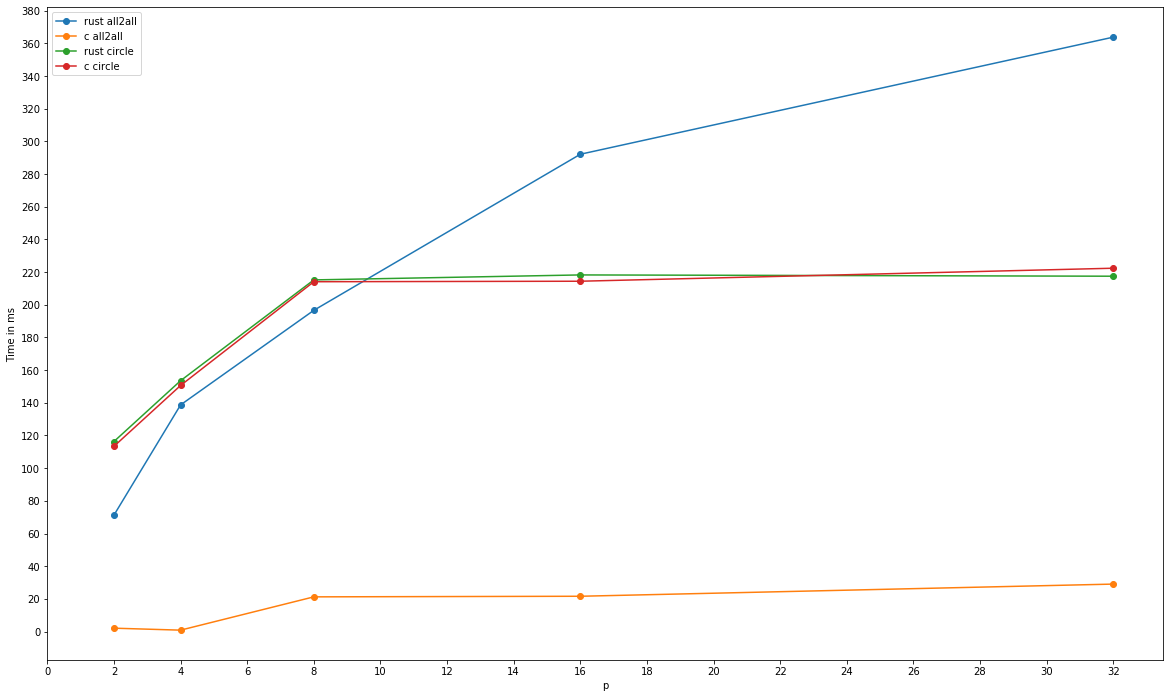

In [19]:
# 2 nodes p=2 message size = 33554432
rust_all_to_all_n_2_p_2=np.array([71.714485, 71.07563, 71.214628, 71.753385, 71.429973, 71.374383, 71.10439, 71.449239, 71.230612, 70.206283])
c_all_to_all_n_2_p_2=np.array([2.088409, 2.132799, 2.041351, 2.057519, 2.048306, 2.125531, 2.050955, 2.074562, 1.996070, 2.057504])
rust_circle_n_2_p_2=np.array([115.504698, 116.242046, 117.240757, 115.717921, 115.70545, 116.694461, 115.328248, 117.912726, 116.544223, 116.104524])
c_circle_n_2_p_2=np.array([113.314394, 114.868592, 112.243600, 112.027045, 113.525111, 112.983979, 112.792380, 114.673737, 113.360640, 113.725189])

# taking avg of all 10 values
rust_all_to_all_p_2 = rust_all_to_all_n_2_p_2.mean(0)
c_all_to_all_p_2 = c_all_to_all_n_2_p_2.mean(0)
rust_circle_p_2= rust_circle_n_2_p_2.mean(0)
c_circle_p_2= c_circle_n_2_p_2.mean(0)

# 2 nodes p=4 message size = 33554432
rust_all_to_all_n_2_p_4=np.array([141.998309, 143.563128, 141.889524, 143.181362, 135.815357, 142.993679, 118.34817, 139.670982, 141.997605, 137.592596])
c_all_to_all_n_2_p_4=np.array([0.802116, 1.053594, 0.776794, 0.777422, 0.801886, 0.780135, 1.233798, 0.797560, 0.783708, 0.800524])
rust_circle_n_2_p_4=np.array([149.189302, 155.964832, 153.144874, 152.393921, 155.764285, 151.062184, 157.470852, 153.400689, 154.715844, 152.07363])
c_circle_n_2_p_4=np.array([152.303852, 148.770843, 153.443204, 153.129674, 153.335894, 152.372833, 142.387901, 154.055523, 152.148370, 143.996829])

# taking avg of all 10 values
rust_all_to_all_p_4 = rust_all_to_all_n_2_p_4.mean(0)
c_all_to_all_p_4 = c_all_to_all_n_2_p_4.mean(0)
rust_circle_p_4 = rust_circle_n_2_p_4.mean(0)
c_circle_p_4 = c_circle_n_2_p_4.mean(0)

# 2 nodes p=8 message size = 33554432
rust_all_to_all_n_2_p_8=np.array([199.492483, 198.804501, 192.584621, 197.408408, 188.476057, 195.528778, 196.709914, 200.130205, 199.695978, 197.075705])
c_all_to_all_n_2_p_8=np.array([24.190944, 20.582281, 20.405263, 22.393622, 20.775456, 21.493036, 21.824636, 15.807007, 22.216905, 22.658199])
rust_circle_n_2_p_8=np.array([212.972938, 218.973382, 216.688086, 216.967976, 205.338643, 211.188104, 216.634787, 217.683326, 218.532667, 217.04604])
c_circle_n_2_p_8=np.array([211.076781, 213.975947, 213.843759, 215.339579, 213.137574, 216.670208, 214.763623, 211.917236, 216.393333, 213.772018])

# taking avg of all 10 values
rust_all_to_all_p_8 = rust_all_to_all_n_2_p_8.mean(0)
c_all_to_all_p_8 = c_all_to_all_n_2_p_8.mean(0)
rust_circle_p_8 = rust_circle_n_2_p_8.mean(0)
c_circle_p_8 = c_circle_n_2_p_8.mean(0)

# 4 nodes p=16 message size = 33554432
rust_all_to_all_n_4_p_16=np.array([290.453833, 302.54823, 294.668156, 284.725398, 290.406013, 293.674284, 293.219915, 297.182646, 291.609987, 282.50005])
c_all_to_all_n_4_p_16=np.array([26.443796, 22.401536, 26.239168, 23.403874, 28.191719, 19.280747, 10.026813, 18.233990, 23.922144, 17.872712])
rust_circle_n_4_p_16=np.array([220.120205, 221.056208, 215.884563, 218.261902, 216.801154, 222.153767, 220.089639, 217.486036, 216.118286, 214.48505])
c_circle_n_4_p_16=np.array([215.210536, 212.186461, 213.045223, 212.857824, 214.823399, 210.286824, 212.966857, 221.702443, 214.699876, 216.105729])

# taking avg of all 10 values
rust_all_to_all_p_16 = rust_all_to_all_n_4_p_16.mean(0)
c_all_to_all_p_16 = c_all_to_all_n_4_p_16.mean(0)
rust_circle_p_16 = rust_circle_n_4_p_16.mean(0)
c_circle_p_16 = c_circle_n_4_p_16.mean(0)

# 8 nodes p=32 message size = 33554432
rust_all_to_all_n_8_p_32=np.array([375.258573, 361.662234, 363.279021, 358.229686, 374.784925, 360.857394, 369.141805, 360.419542, 355.047349, 359.040859])
c_all_to_all_n_8_p_32=np.array([14.067918, 40.168541, 32.759484, 27.501818, 23.670562, 38.834343, 35.153458, 34.636725, 25.607673, 18.062284])
rust_circle_n_8_p_32=np.array([222.50497, 216.349264, 238.542625, 216.946272, 218.389509, 214.000183, 224.713646, 203.531016, 214.838828, 204.78731])
c_circle_n_8_p_32=np.array([224.194404, 215.357380, 223.507838, 224.706465, 216.597820, 229.785666, 219.124021, 227.724930, 225.364361, 217.195325])

# taking avg of all 10 values
rust_all_to_all_p_32 = rust_all_to_all_n_8_p_32.mean(0)
c_all_to_all_p_32 = c_all_to_all_n_8_p_32.mean(0)
rust_circle_p_32 = rust_circle_n_8_p_32.mean(0)
c_circle_p_32 = c_circle_n_8_p_32.mean(0)

p = [2, 4, 8, 16, 32]

fig, ax = plt.subplots()
ax.plot(p, [rust_all_to_all_p_2,rust_all_to_all_p_4,rust_all_to_all_p_8,rust_all_to_all_p_16,rust_all_to_all_p_32],marker='o',label="rust all2all")
ax.plot(p, [c_all_to_all_p_2,c_all_to_all_p_4,c_all_to_all_p_8,c_all_to_all_p_16,c_all_to_all_p_32],marker='o',label="c all2all")
ax.plot(p, [rust_circle_p_2,rust_circle_p_4,rust_circle_p_8,rust_circle_p_16,rust_circle_p_32],marker='o',label='rust circle')
ax.plot(p, [c_circle_p_2,c_circle_p_4,c_circle_p_8,c_circle_p_16,c_circle_p_32],marker='o',label='c circle')
plt.legend(loc="upper left")
plt.xlabel("p")
plt.ylabel("Time in ms")
plt.xticks(np.arange(0,34,step=2))
plt.yticks(np.arange(0,400,step=20))
